# Lab | Customer Analysis Round 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### store table (marketing_customer_analysis.csv) into a variable (data) and display 
#### next time use name "df" instead od "data" df=dataframe (Datensatz)

In [2]:
data = pd.read_csv('./marketing_customer_analysis.csv')
display(data)


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


### Show the dataframe shape (10910 rows/26 columns)

In [3]:
data.shape

(10910, 26)

### Show the data types in each column

In [4]:
data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

### Which columns are numerical?

In [5]:
numerical_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()
numerical_cols

['Unnamed: 0',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [6]:
data.select_dtypes(['int', 'float'])

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


### Which columns are categorical?

In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [8]:
data.select_dtypes(['object'])

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


### drop index column (Unnamed: 0)

In [9]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### convert column names to "snake format" (kleingedruckt)(lower)
#### hashed out! (since added later) /append=anhängen
#### https://www.programiz.com/python-programming/methods/list/append

In [10]:
cols = []
for column in data.columns:
    cols.append(column.lower())
data.columns = cols

### replace spaces in column names with "_"
#### hashed out! (since added later)

In [11]:
cols = []
for column in data.columns:
    cols.append(column.replace(' ', '_'))
data.columns = cols

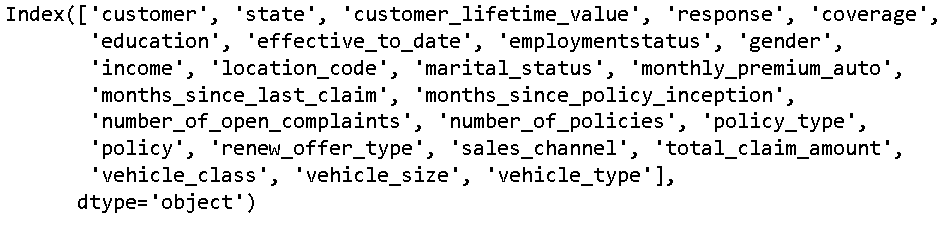

### show names of columns

In [12]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

### show/count NaN values in every column

In [13]:
data.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

### Create new dataframe (df2) from the old dataframe (data), where all rows are droped if they have a NaN-value in the column 'Response'. Why?--> Because maybe we get rid of the most NaN-values in the whole dataframe.

In [14]:
df2 = data[data['response'].isna()==False]

In [15]:
df2.isna().sum()

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           591
months_since_policy_inception       0
number_of_open_complaints         591
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     591
vehicle_size                      591
vehicle_type                     5164
dtype: int64

### display unique values in column "State" and count them (including NaN-values (dropna=False)

In [16]:
data["state"].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

### exchange NaN-values with 'Unknown' (.fillna)

In [17]:
data['state'] = data['state'].fillna('Unknown')

### display unique values in column "State" and count them (including NaN-values (dropna=False)

In [18]:
data["state"].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Unknown        631
Name: state, dtype: int64

### display unique values in column "State" in an array

In [19]:
data['state'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', 'Unknown',
       'Nevada'], dtype=object)

### display unique values in column "Response" in an array and count

In [20]:
# check unique values in column 'Response'
data['response'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
# show values in column 'Response' --> "dropna=False" to show NaN value
data['response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

### convert NaN-values in the column  'Response' to "Unknown"

In [22]:
data['response'] = data['response'].fillna('Unknown')

In [23]:
# show values in column 'Response' --> "dropna=False" to show NaN value
data['response'].value_counts(dropna=False)

No         8813
Yes        1466
Unknown     631
Name: response, dtype: int64

### display unique values in column "Months Since Last Claim" in an array and count

In [24]:
# show unique values in column 'months_since_last_claim'
data['months_since_last_claim'].unique()

array([ 7.,  3., 34., 10., nan,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.,  0.])

In [25]:
# "dropna=False" to show NaN value
data['months_since_last_claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months_since_last_claim, dtype: int64

### ???can't drop any NaN row

In [26]:
data.dropna(subset = ['months_since_last_claim'])
#data = data[data.months_since_last_claim != NaN]
data['months_since_last_claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months_since_last_claim, dtype: int64

#### Drop row that has all NaN values

In [27]:
# data=data.dropna(how='all')

### Fill NaN-values in column 'Months Since Last Claim' with median-value of the other values 

In [28]:
data['months_since_last_claim'] = data['months_since_last_claim'].fillna(data['months_since_last_claim'].median())

In [29]:
# show unique values in column 'Number of Open Complaints'
data['number_of_open_complaints'].unique()

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

In [30]:
# show values in column 'number_of_open_complaints' --> "dropna=False" to show NaN value
data['number_of_open_complaints'].value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: number_of_open_complaints, dtype: int64

In [31]:
data['number_of_open_complaints'].median()

0.0

In [32]:
# deside to give the NaN's the most common value
data['number_of_open_complaints'] = data['number_of_open_complaints'].fillna(0.0)

In [33]:
# show values in column 'number_of_open_complaints' --> "dropna=False" to show NaN value
data['number_of_open_complaints'].value_counts(dropna=False)

0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number_of_open_complaints, dtype: int64

In [34]:
# show unique values in column 'vehicle_class'
data['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

In [35]:
# show values in column 'Vehicle Class' --> "dropna=False" to show NaN value
data['vehicle_class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [36]:
# classify NaN's to unknown value
data['vehicle_class'] = data['vehicle_class'].fillna('unknown')

In [37]:
# show values in column 'Vehicle Class' --> "dropna=False" to show NaN value
data['vehicle_class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
unknown           622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [38]:
# show unique values in column 'Vehicle Size'
data['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large', nan], dtype=object)

In [39]:
data['vehicle_size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle_size, dtype: int64

In [40]:
# put NaN's into unknown
data['vehicle_size'] = data['vehicle_size'].fillna('unknown')

In [41]:
data['vehicle_size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
unknown     622
Name: vehicle_size, dtype: int64

In [42]:
# show values in column 'Vehicle Type' --> "dropna=False" to show NaN value
data['vehicle_type'].unique()

array([nan, 'A'], dtype=object)

In [43]:
# show values in column 'Vehicle Type' --> "dropna=False" to show NaN value
data['vehicle_type'].value_counts(dropna=False)

NaN    5482
A      5428
Name: vehicle_type, dtype: int64

In [44]:
# NaN's became 'M' (A=automatic; M=manuell)
data['vehicle_type'] = data['vehicle_type'].fillna('M')

In [45]:
# show values in column 'Vehicle Type' --> "dropna=False" to show NaN value
data['vehicle_type'].value_counts(dropna=False)

M    5482
A    5428
Name: vehicle_type, dtype: int64

### use pandas .describe-function to show statistic values...".T" transpose column titles to row titles and vice versa

In [46]:
round(data.describe(),0).T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.0,6885.0,1898.0,4014.0,5771.0,8993.0,83325.0
income,10910.0,37536.0,30359.0,0.0,0.0,33814.0,62251.0,99981.0
monthly_premium_auto,10910.0,93.0,34.0,61.0,68.0,83.0,109.0,298.0
months_since_last_claim,10910.0,15.0,10.0,0.0,7.0,14.0,23.0,35.0
months_since_policy_inception,10910.0,48.0,28.0,0.0,24.0,48.0,71.0,99.0
number_of_open_complaints,10910.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
number_of_policies,10910.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0
total_claim_amount,10910.0,435.0,292.0,0.0,271.0,383.0,547.0,2893.0


### "include=[object]" to display statistic about non-numerical columns

In [47]:
data.describe(include=[object]).T

,count,unique,top,freq
customer,10910,9134,ID89933,7
state,10910,6,California,3552
response,10910,3,No,8813
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
effective_to_date,10910,59,1/10/11,239
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location_code,10910,3,Suburban,6902
marital_status,10910,3,Married,6319


### Extract the months from the dataset and store it into a separate column

In [48]:
# data['Year'] = pd.DatetimeIndex(data['effective_to_date']).year
# data['Year'].unique()
# data['Day'] = pd.DatetimeIndex(data['effective_to_date']).day
# data['Day'].unique()
data['month'] =pd.DatetimeIndex(data['effective_to_date']).month
data['month'].unique()

array([2, 1], dtype=int64)

In [49]:
data.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,M,2


In [50]:
# show values in column 'month' --> "dropna=False" to show NaN value
data['month'].value_counts(dropna=False)

1    5818
2    5092
Name: month, dtype: int64

### filter the data to show only the information for the first quarter

In [51]:
display(data[data['month']<4])

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [52]:
# show values in column 'gender' --> "dropna=False" to show NaN value
data['gender'].value_counts(dropna=False)

F    5573
M    5337
Name: gender, dtype: int64

# Lab | Customer Analysis Round 3
### EDA (Exploratory Data Analysis)

#### show dataframe info

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

### describe dataframe for categorical data

In [54]:
data.describe(include=[object]).T

,count,unique,top,freq
customer,10910,9134,ID89933,7
state,10910,6,California,3552
response,10910,3,No,8813
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
effective_to_date,10910,59,1/10/11,239
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location_code,10910,3,Suburban,6902
marital_status,10910,3,Married,6319


### describe dataframe for numerical data

In [55]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


### Show a plot of the total number of responses.

<AxesSubplot:>

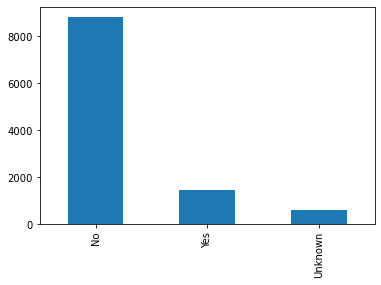

In [56]:
data.response.value_counts().plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


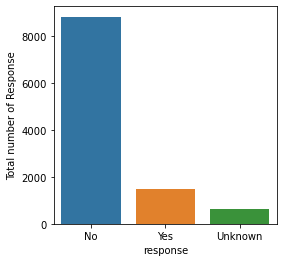

In [57]:
plt.figure(figsize=(4,4))
sns.countplot('response', data=data)
plt.ylabel('Total number of Response')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

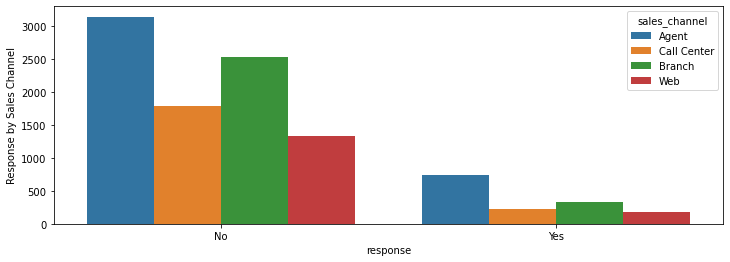

In [58]:
plt.figure(figsize=(12,4))
sns.countplot('response', hue='sales_channel', data=df2) # data don't work
plt.ylabel('Response by Sales Channel')
plt.show

### show the percentage distribution

In [59]:
response_rate = data.response.value_counts()/len(data['response'])
display(round(response_rate*100),0)
print("-----------------------")
display(data.response.value_counts())
print("-----------------------")
display(len(data['response']))

No         81.0
Yes        13.0
Unknown     6.0
Name: response, dtype: float64

0

-----------------------


No         8813
Yes        1466
Unknown     631
Name: response, dtype: int64

-----------------------


10910

### insert a column 'response_rate' (with np.where) where response equels Yes (=1)...(No and Unknown = 0)

In [60]:
data['response_rate'] = np.where(data['response']=='Yes', 1, 0)
data['response_rate']

0        0
1        0
2        0
3        1
4        0
        ..
10905    0
10906    0
10907    0
10908    0
10909    0
Name: response_rate, Length: 10910, dtype: int32

### insert a column 'response_rate2' (with lambda) where response equels Yes (=1)...(No and Unknown = 0)

In [61]:
data['response_rate2'] = data['response'].apply(lambda x : 1 if x == 'Yes' else 0)

In [62]:
data.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,response_rate,response_rate2
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0,0
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,0


### Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='response_rate'>

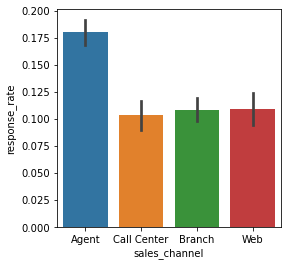

In [63]:
plt.figure(figsize=(4,4))
sns.barplot(x="sales_channel", y="response_rate", data=data)

### Show a plot of the response rate by the sales channel. (response_rate2)

<AxesSubplot:xlabel='sales_channel', ylabel='response_rate2'>

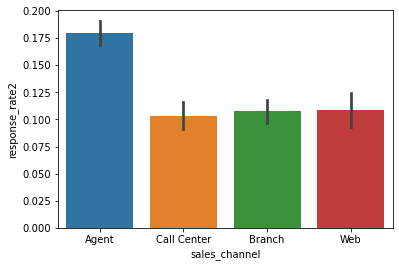

In [64]:
sns.barplot(x="sales_channel", y="response_rate2", data=data)


### Show a plot of the response rate by the total claim amount. 
total claim amount = Gesamtforderungsbetrag

In [65]:
%%time 
#sns.barplot(x="total_claim_amount", y="response_rate", data=data)

CPU times: total: 0 ns
Wall time: 0 ns


not very useful...runs very long!

##### sort 'total_claim_amount' by quantiles to reduce number of bars (qcut to 8 bins)--> new column 'quantil_claim_amount'

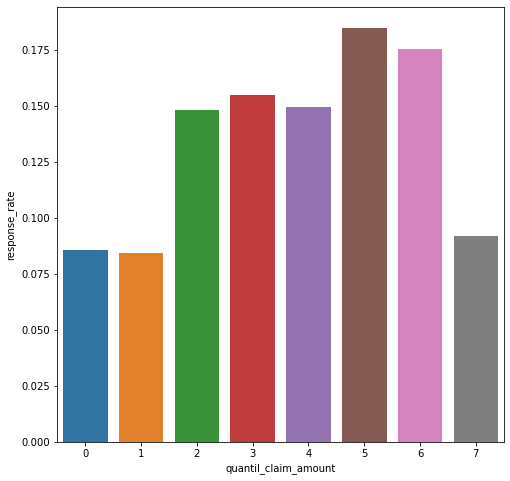

In [66]:
plt.figure(figsize=(8,8))
data['quantil_claim_amount'] = pd.qcut(data['total_claim_amount'], 8, labels=False, duplicates ='drop')
sns.barplot(data=data, x='quantil_claim_amount', y='response_rate', estimator= np.mean, ci=None)
plt.show()

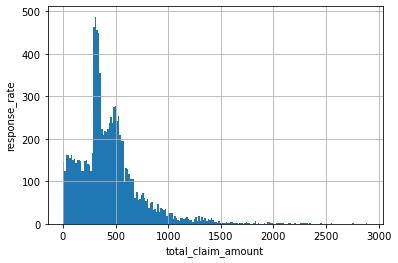

In [67]:
data['total_claim_amount'].hist(bins=200)
plt.xlabel('total_claim_amount')
plt.ylabel('response_rate')
plt.show()

### show statistics about total_claim_amount

In [68]:
data['total_claim_amount'].describe()

count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: total_claim_amount, dtype: float64

### Show a plot of the response rate by income.

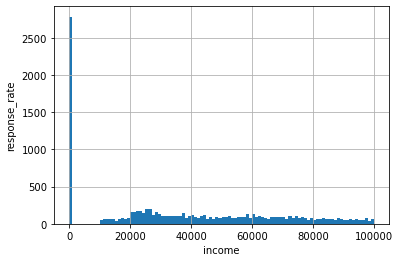

In [69]:
data['income'].hist(bins=100)
plt.xlabel('income')
plt.ylabel('response_rate')
plt.show()

##### sort 'income' by quantiles to reduce number of bars--> new column 'quantil_income'

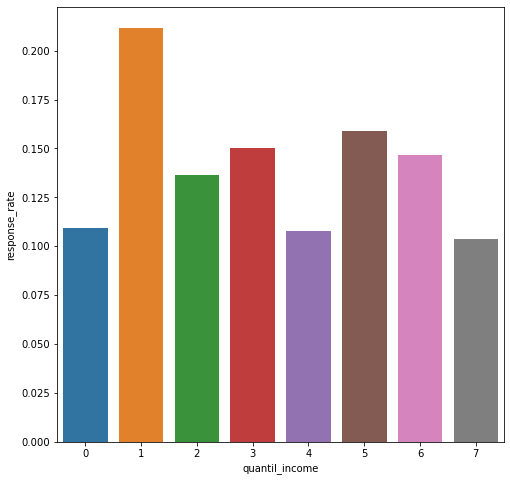

In [70]:
plt.figure(figsize=(8,8))
data['quantil_income'] = pd.qcut(data['income'], 10, labels=False, duplicates ='drop')
sns.barplot(data=data, x='quantil_income', y='response_rate', estimator= np.mean, ci=None)
plt.show()

# Lab | Customer Analysis Round 4

#### Check the data types of the columns.

In [71]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

#### Get the numeric data into dataframe called numerical

In [72]:
numerical = data.select_dtypes(include=['float', 'int']).columns.tolist()
numerical

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'month',
 'response_rate',
 'response_rate2',
 'quantil_claim_amount',
 'quantil_income']

#### Get the categorical columns in a dataframe called categoricals

In [73]:
categoricals = data.select_dtypes(include=['object']).columns.tolist()
categoricals

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

## matplotlib (plt) and seaborn (sns)

Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots (Verteilungsdiagramme) for the numerical variables
Use Matplotlib to construct histograms

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### show a plot of total number of responses

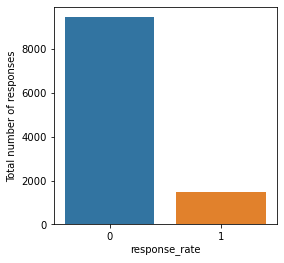

In [75]:
plt.figure(figsize=(4,4))
sns.countplot(x='response_rate', data=data)
plt.ylabel('Total number of responses')
# sns.set(rc={'figure.figsize':(200,200)}) # resize tables dont't work!!!
plt.show()

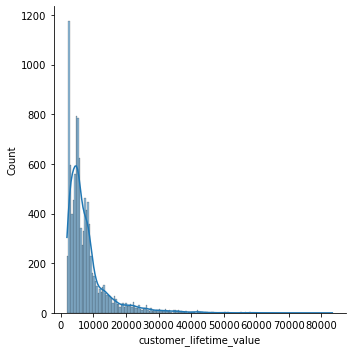

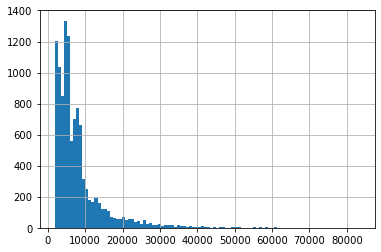

<Figure size 864x288 with 0 Axes>

In [76]:
sns.displot(data['customer_lifetime_value'],  kde=True)
plt.show()

data['customer_lifetime_value'].hist(bins=100)
plt.figure(figsize=(12,4))
plt.show()

# don`t look like normal distribution

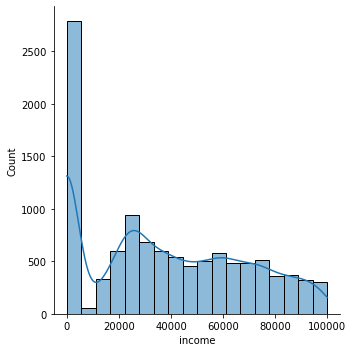

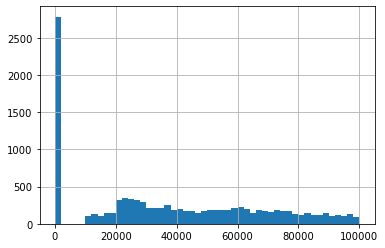

<Figure size 288x288 with 0 Axes>

In [77]:
sns.displot(data['income'],  kde=True)
plt.show()

data['income'].hist(bins=50)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

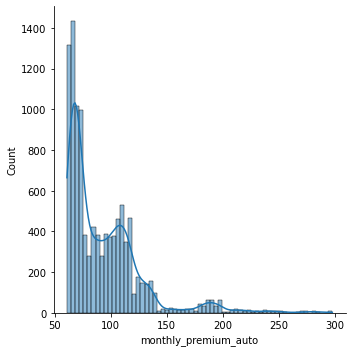

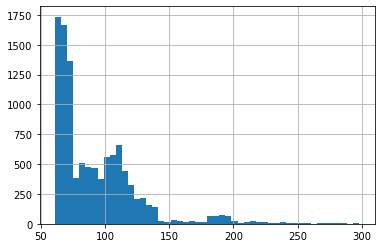

<Figure size 288x288 with 0 Axes>

In [78]:
sns.displot(data['monthly_premium_auto'], kde=True)
plt.show()

data['monthly_premium_auto'].hist(bins=50)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

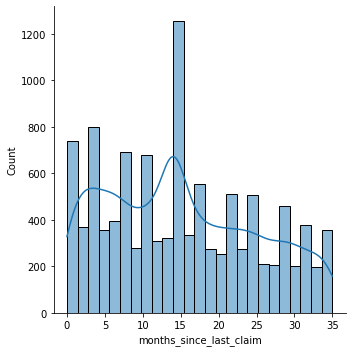

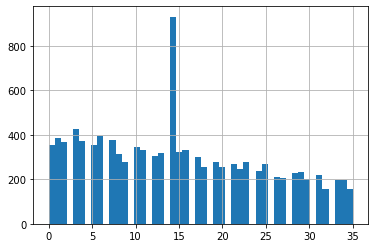

<Figure size 288x288 with 0 Axes>

In [79]:
sns.displot(data=data, x="months_since_last_claim", kde=True)
plt.show()

data['months_since_last_claim'].hist(bins=50)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

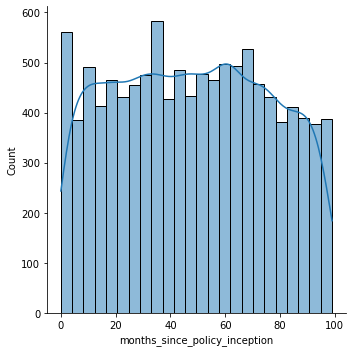

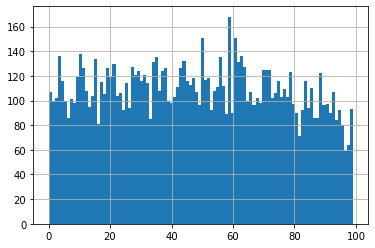

<Figure size 288x288 with 0 Axes>

In [80]:
sns.displot(data=data, x="months_since_policy_inception", kde=True)
plt.show()

data['months_since_policy_inception'].hist(bins=100)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

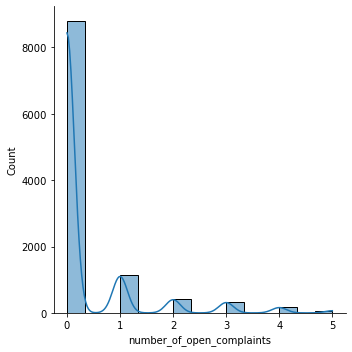

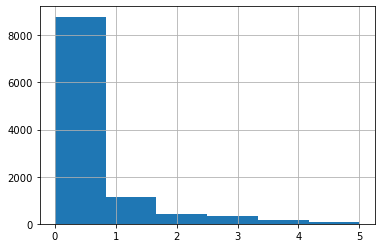

<Figure size 288x288 with 0 Axes>

In [81]:
sns.displot(data=data, x="number_of_open_complaints", kde=True)
plt.show()

data['number_of_open_complaints'].hist(bins=6)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

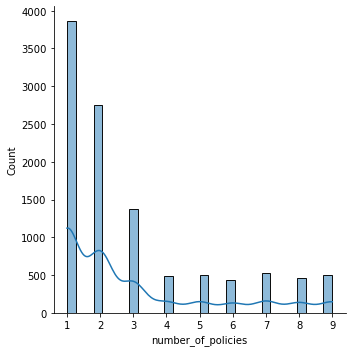

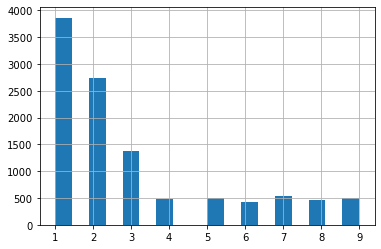

<Figure size 288x288 with 0 Axes>

In [82]:
sns.displot(data=data, x="number_of_policies", kde=True)
plt.show()

data['number_of_policies'].hist(bins=18)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

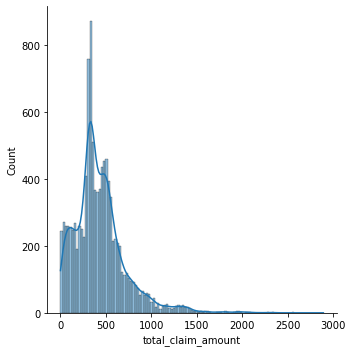

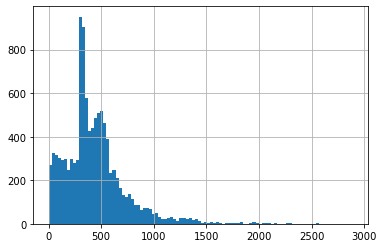

<Figure size 288x288 with 0 Axes>

In [83]:
sns.displot(data=data, x="total_claim_amount", kde=True)
plt.show()

data['total_claim_amount'].hist(bins=100)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

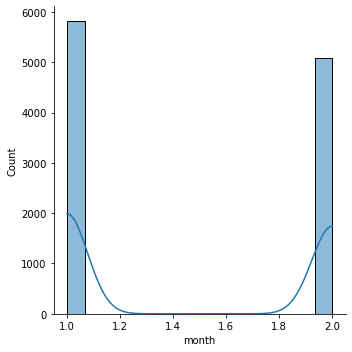

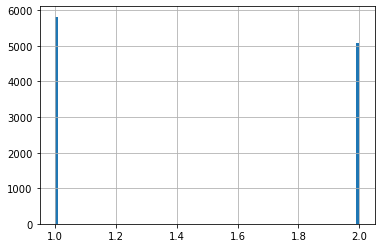

<Figure size 288x288 with 0 Axes>

In [84]:
sns.displot(data=data, x="month", kde=True)
plt.show()

data['month'].hist(bins=100)
plt.figure(figsize=(4,4))
plt.show()

# don`t look like normal distribution

##### Do the distributions for different numerical variables look like a normal distribution --> see above

### For the numerical variables, check the multicollinearity between the features. 

Multikollinearität (engl. Multicollinearity) liegt vor, wenn mehrere Prädiktoren in einer Regressionsanalyse stark 
miteinander korrelieren. Man betrachtet bei der Multikollinearität also nicht die Korrelation der Prädiktoren 
mit dem Kriterium , sondern die Korrelationen der verschiedenen Prädiktoren untereinander.

In [85]:
numerical = data.select_dtypes(include='number')
categorical = data.select_dtypes(include='object')

### correlation matrix

In [86]:
correlations_matrix = numerical.corr()
display(correlations_matrix)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate,response_rate2,quantil_claim_amount,quantil_income
customer_lifetime_value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765,-0.007765,0.187990,0.028158
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156,0.011156,-0.386805,0.987544
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918,0.013918,0.497486,-0.007099
months_since_last_claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340,-0.019666,-0.015016,-0.015016,0.002522,-0.022115
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875,-0.004875,-0.007137,-0.004351
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419,-0.004419,-0.018482,0.011618
number_of_policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650,-0.018650,-0.013968,-0.010338
total_claim_amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416,0.016416,0.874713,-0.345068
month,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981,-0.032981,0.002944,-0.004723
response_rate,-0.007765,0.011156,0.013918,-0.015016,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000,1.000000,0.048081,0.000542


### seaborn heatmap

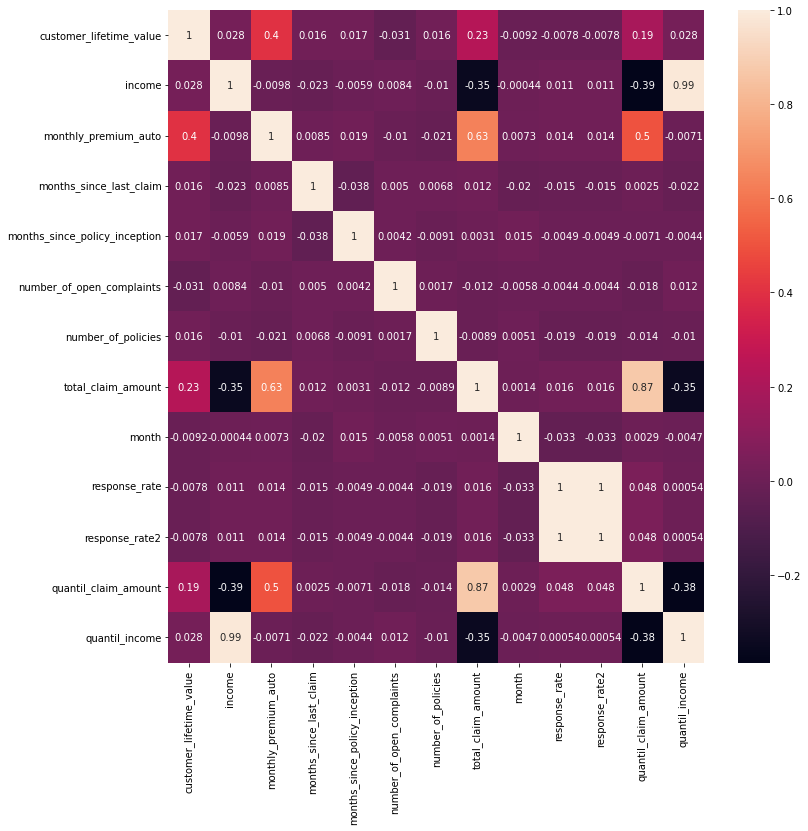

In [87]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

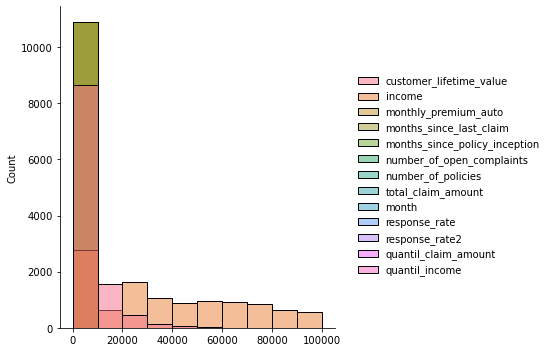

In [88]:
sns.displot(numerical, bins=10)
plt.show()

In [89]:
# numerical.hist(bins=50)
# plt.show()

In [90]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# If there is no pair of features that have a high correlation, then do not drop any features

In [91]:
data = data.drop(['response_rate2'], axis=1)
data = data.drop(['quantil_claim_amount'], axis=1)
data = data.drop(['quantil_income'], axis=1)

In [92]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,response_rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,0


# Lab | Customer Analysis Round 5

### X-y split for 'total_claim_amount'

In [93]:
# define the label
y = numerical['total_claim_amount'] 
# define the features
X = numerical.drop(['total_claim_amount'], axis=1) 

In [94]:
# Linear Regression Model
#lm = linear_model.LinearRegression()
#training
#lm.fit(X,y) 
#print("b0 = " , lm.intercept_)
#print("b1 = " , lm.coef_)

### MinMaxScaler 

In [95]:
from sklearn.preprocessing import MinMaxScaler 

y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X_numerical = X.select_dtypes(include = np.number) # all numerical values
X_categorical = X.select_dtypes(include = object) # all categorical values

In [96]:
round(X_numerical, 1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,4809.2,48029,61,7.0,52,0.0,9,2,0
1,2228.5,0,64,3.0,26,0.0,1,1,0
2,14947.9,22139,100,34.0,31,0.0,2,2,0
3,22332.4,49078,97,10.0,3,0.0,2,1,1
4,9025.1,23675,117,14.0,31,0.0,7,1,0
...,...,...,...,...,...,...,...,...,...
10905,15563.4,0,253,14.0,40,0.0,7,1,0
10906,5259.4,61146,65,7.0,68,0.0,6,1,0
10907,23893.3,39837,201,11.0,63,0.0,2,2,0
10908,11972.0,64195,158,0.0,27,4.0,6,2,0


### Normalize (numerical) (max-value=1; min-value=0) --> MinMaxScaler

In [97]:
trainer = MinMaxScaler().fit(X_numerical) 
X_normalized = trainer.transform(X_numerical) 
print(X_normalized.shape)


(10910, 9)


### normalized numerical values

In [98]:
X_normalized

array([[0.03575222, 0.48038127, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.00405905, 0.        , 0.01265823, ..., 0.        , 0.        ,
        0.        ],
       [0.16026441, 0.22143207, 0.16455696, ..., 0.125     , 1.        ,
        0.        ],
       ...,
       [0.27012165, 0.3984457 , 0.5907173 , ..., 0.125     , 1.        ,
        0.        ],
       [0.12371724, 0.64207199, 0.4092827 , ..., 0.625     , 1.        ,
        0.        ],
       [0.06090719, 0.        , 0.16877637, ..., 0.25      , 0.        ,
        0.        ]])

In [99]:
pd.DataFrame(X_normalized, columns=X_numerical.columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.400000,0.404040,0.0,0.750,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,0.0


### statistics normalized numerical values

In [100]:
pd.DataFrame(X_normalized, columns=X_numerical.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
income,10910.0,0.375434,0.303650,0.0,0.000000,0.338199,0.622626,1.0
monthly_premium_auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,10910.0,0.430926,0.279635,0.0,0.200000,0.400000,0.657143,1.0
months_since_policy_inception,10910.0,0.485777,0.282229,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,10910.0,0.072392,0.178027,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0
month,10910.0,0.466728,0.498915,0.0,0.000000,0.000000,1.000000,1.0
response_rate,10910.0,0.134372,0.341067,0.0,0.000000,0.000000,0.000000,1.0


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

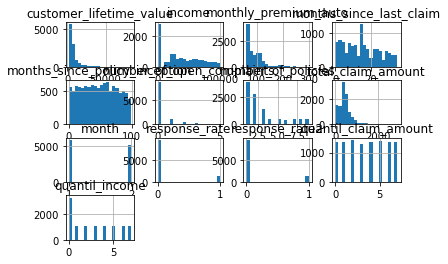

In [118]:
numerical.hist(bins=20)
plt.show()

In [102]:
#numeric_cols=['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','total_claim_amount','month']
#numeric_data_minmax = MinMaxScaler().fit_transform(numerical)
#pd.DataFrame(numeric_data_minmax, columns=numeric_cols).hist()
#plt.show()
# don't work!

In [103]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer # to be able to transform the columns
from seaborn import load_dataset

In [104]:
X_numerical = X.select_dtypes(include = np.number) # numerical values
X_categorical = X.select_dtypes(include = object) # categorical values

In [105]:
round(X_numerical, 2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,4809.22,48029,61,7.0,52,0.0,9,2,0
1,2228.53,0,64,3.0,26,0.0,1,1,0
2,14947.92,22139,100,34.0,31,0.0,2,2,0
3,22332.44,49078,97,10.0,3,0.0,2,1,1
4,9025.07,23675,117,14.0,31,0.0,7,1,0
...,...,...,...,...,...,...,...,...,...
10905,15563.37,0,253,14.0,40,0.0,7,1,0
10906,5259.44,61146,65,7.0,68,0.0,6,1,0
10907,23893.30,39837,201,11.0,63,0.0,2,2,0
10908,11971.98,64195,158,0.0,27,4.0,6,2,0


#### Normalize (range data from 0-1) and train the scaler with values of X_num--> MinMaxScaler

In [106]:
X_num2 = MinMaxScaler().fit(X_numerical)


In [107]:
x_normalized = X_num2.transform(X_numerical) # storing the transformed data in a variable and transforming it
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_numerical.columns)

(10910, 9)


In [108]:
pd.DataFrame(x_normalized, columns=X_numerical.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
income,10910.0,0.375434,0.303650,0.0,0.000000,0.338199,0.622626,1.0
monthly_premium_auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,10910.0,0.430926,0.279635,0.0,0.200000,0.400000,0.657143,1.0
months_since_policy_inception,10910.0,0.485777,0.282229,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,10910.0,0.072392,0.178027,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0
month,10910.0,0.466728,0.498915,0.0,0.000000,0.000000,1.000000,1.0
response_rate,10910.0,0.134372,0.341067,0.0,0.000000,0.000000,0.000000,1.0


In [109]:
#numerical.hist(bins=15)
#sns.set(rc={'figure.figsize':(20,20)}) # resize tables
#plt.show()

# Lab | Customer Analysis Round 6

In [110]:
X_categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [111]:
X_categorical.head(1)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M


In [112]:
X_categorical = X_categorical.drop(['customer'], axis = 1)

In [113]:
X_categorical = X_categorical.drop(['effective_to_date'], axis = 1)

In [143]:
# pd.DataFrame(X_categorical)

### One Hot/Label Encoding (categorical).

In [115]:
encoder = OneHotEncoder(drop='first').fit(X_categorical) 
cols = encoder.get_feature_names_out(input_features=X_categorical.columns)
X_cat_encode = pd.DataFrame(encoder.transform(X_categorical).toarray(),columns=cols)
display(X_cat_encode.head())
print("------------------------")
display(X_cat_encode.shape)

,state_California,state_Nevada,state_Oregon,state_Unknown,state_Washington,response_Unknown,response_Yes,coverage_Extended,coverage_Premium,education_College,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


------------------------


(10910, 48)

### concatinate normalized and encoded dataframes

In [144]:
X = pd.concat([x_normalized, X_cat_encode], axis=1)
#display(X)
#print("--------------------------------")
#display(X.dtypes)

### Train-test split
##### Das Train-Test-Split-Verfahren besteht aus zufälligen Teilen eines Datensatzes. Ein Teil wird verwendet, um das Machine Learning-Modell zu trainieren, der andere Teil, um das Modell zu validieren. Im Allgemeinen reservieren wir 70 % bis 80 % der Daten im Datensatz für das Training.

In [174]:
from sklearn.model_selection import train_test_split
import matplotlib
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34) #exclude random_state

In [175]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7637, 57)
(3273, 57)
(7637,)
(3273,)


In [176]:
# X_train.head()

In [177]:
y_train.head()

8037    336.000000
4058    302.400000
6062    768.000000
2082    309.424708
147     257.248789
Name: total_claim_amount, dtype: float64

### Linear regression
##### Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [178]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [179]:
y_test[:5]

580        33.192803
5145      344.693511
7813     1178.950186
1798      415.850776
10021     451.200000
Name: total_claim_amount, dtype: float64

### R2
##### gibt an, wie viel Streuung in den Daten durch ein vorliegendes lineares Regressionsmodell „erklärt“ werden kann.

In [180]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7709074960777585

In [181]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7691609516760542

In [182]:
y_test[:5]

580        33.192803
5145      344.693511
7813     1178.950186
1798      415.850776
10021     451.200000
Name: total_claim_amount, dtype: float64

In [183]:
predictions_test[:5]

array([-49.4220834 , 280.41653965, 783.02701881, 390.7495309 ,
       518.35623691])

### MSE
##### Der Mean Squared Error, kurz MSE, ist definiert als der erwartete quadratische Abstand des Schätzwerts. Er wird auch als die Metrik definiert, die die Qualität des Prognosemodells oder Prädiktors bewertet.

In [184]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

20564.91562557181

### RMSE
##### Maß für die Genauigkeit der Regression. Er ist definiert als Quadratwurzel des erwartungstreuen Schätzers für die unbekannte Varianz der Störgrößen (englisch root mean squared error, kurz RMSE)

In [185]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

143.40472665003693

In [186]:
y_test.mean()

435.50866372746793

### MAE
##### Mean Absolute Error (MAE): der Durchschnitt der Abweichungen aller einzelnen Punkte vom Modell.

In [187]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

96.73583957984007


# Lab | Customer Analysis Round 7

In [189]:
#### test_size=0.30, random_state=34, StandardScaler:
####    r2_score(y_train, predictions)=0.7708459603075914
####    r2_score(y_test, predictions_test)=0.7691177665820166
####    MSE: 20568.762885477005
####    RMSE: 143.41814001540044
####    MAE: 96.73437102062329

#### test_size=0.30, random_state=34, MinMaxScaler:
####    r2_score(y_train, predictions)=0.7709074960777585
####    r2_score(y_test, predictions_test)=0.7691609516760542
####    MSE: 20564.91562557181
####    RMSE: 143.40472665003693
####    MAE: 96.73583957984007

#### test_size=0.25, random_state=34, MinMaxScaler:
####    r2_score(y_train, predictions)=0.7727492378756562
####    r2_score(y_test, predictions_test)=0.7637368415933571
####    MSE: 20175.962624390737
####    RMSE: 142.04211567134143
####    MAE: 96.43386102819369

#### test_size=0.20, random_state=34, MinMaxScaler:
####    r2_score(y_train, predictions)=0.7697085979498753
####    r2_score(y_test, predictions_test)=0.7739156358111379
####    MSE: 20090.382979544924
####    RMSE: 141.74054811360412
####    MAE: 96.20965359529227

#### test_size=0.15, random_state=34, MinMaxScaler:
####    r2_score(y_train, predictions)=0.7700380254771444
####    r2_score(y_test, predictions_test)=0.7752859644851957
####    MSE: 18652.636777006977
####    RMSE: 136.57465642280408
####    MAE: 95.00189717819451

# as smaller the test-size as smaller is the mae (smaller is better)


### StandardScaler

In [195]:
from sklearn.preprocessing import StandardScaler

standard_transformer = StandardScaler().fit(X_numerical) # train the scaler with the values from X_numerical
x_standardized2 = standard_transformer.transform(X_numerical) 
print(x_standardized2.shape)
x_standardized2 = pd.DataFrame(x_standardized2, columns=X_numerical.columns)

(10910, 9)


In [194]:
# pd.DataFrame(x_standardized, columns=X_numerical.columns).describe().T

In [196]:
X = pd.concat([x_standardized2, X_cat_encode], axis=1)
#display(X)
#print("--------------------------------")
#display(X.dtypes)

In [197]:
from sklearn.model_selection import train_test_split
import matplotlib
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34) #exclude random_state

In [198]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7637, 57)
(3273, 57)
(7637,)
(3273,)


In [199]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [200]:
y_test[:5]

580        33.192803
5145      344.693511
7813     1178.950186
1798      415.850776
10021     451.200000
Name: total_claim_amount, dtype: float64

In [201]:
predictions_test[:5]

array([-49.4220834 , 280.41653965, 783.02701881, 390.7495309 ,
       518.35623691])

In [202]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions) 

0.7708459603075914

In [203]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7691177665820166

In [204]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

20568.762885477005

In [205]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

143.41814001540044

In [206]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

96.73437102062329
